In [66]:
####### All required imports ########
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display
import matplotlib
import os
###################################
### We are supressing all warnings with an assurance that the 
#  warnings that are supressed are are not substantial #
#########################################
import warnings
warnings.filterwarnings('ignore')
###################################

In [67]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.figure_format = 'retina'
rc={'font.size': 22, 'axes.labelsize': 22, 'legend.fontsize': 22.0, 
    'axes.titlesize': 22, 'xtick.labelsize': 12, 'ytick.labelsize': 16,
    'font.family':'monospace', 'font.monospace': 'Courier New',
    'legend.fontsize': 15.0, 'figure.figsize': [15, 8]}
plt.rcParams.update(**rc)
sns.set(style='white', rc=rc)

In [68]:
###### Resolve the path of the data source #######
ROOT = r'../res/baseball'
# -----  team data ----- #
_salary = os.path.join(ROOT, 'Salaries.csv')
_master = os.path.join(ROOT, 'Master.csv')
_teams = os.path.join(ROOT, 'Teams.csv')

In [69]:
##### Read the data files #######
data_1 = pd.read_csv(_salary)
master = pd.read_csv(_master)
####### Creating data_1 and pulling the fileds form csvs that we need only #######
required_master_cols = ['playerID', 'nameFirst', 'nameLast', 'weight', 'height', 'bats', 'throws']
data_1 = data_1.merge(master[required_master_cols], on='playerID', how='inner')
data_1['fullName'] = data_1['nameFirst'] + '_' + data_1['nameLast']


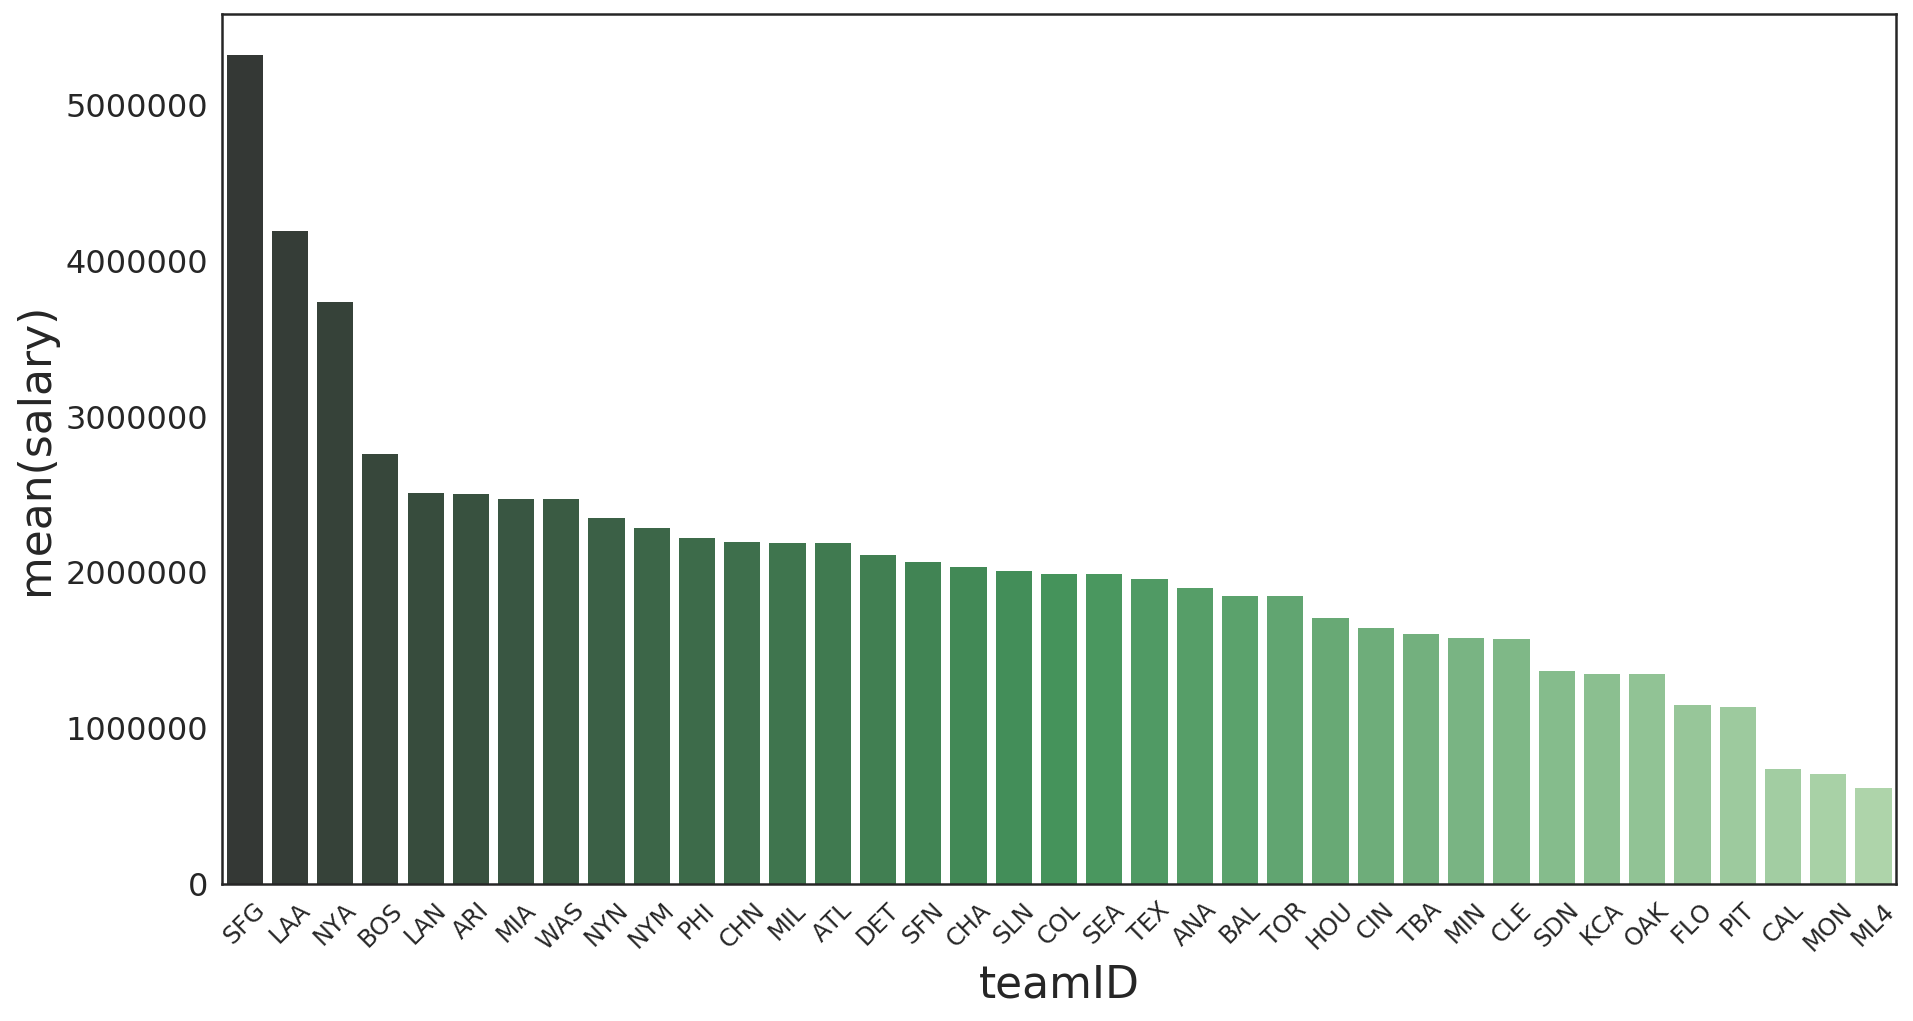

In [70]:
###### First we want to see how teams invested in their player #########

##### Clean and extract the fields we require #########
plt_data = data_1.groupby('teamID', as_index=False)['salary'].mean()
plt_data.sort_values(['salary'], ascending=False, inplace=True)
plt_data = plt_data.reset_index().drop('index', axis=1)
# display(plt_data)
########################################################
#~~~~~~~~~~~~~~~  NOW PLOT THE DATA ~~~~~~~~~~~~~~~~~~#
ax = sns.barplot(x="teamID", y="salary", data=plt_data, palette="Greens_d")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Now we know that `SFG, LAA, NYA, BOS, LAN` are the top 5 teams in terms of spending money on their players. The next thing that we should do is to check what are top **players** in terms of salary and logically they should be from **these top teams**.

In [71]:
plot_data = data_1.groupby(['fullName'], as_index=False)['salary'].mean()
plot_data.sort_values(['salary'], inplace=True, ascending=False)
ten_most_expensive_players = plot_data.fullName.head(n=10)

###########  this part is important for later use   ##########
# It stores the top 10 players and their teams they played #
their_clubs = []
g=data_1[data_1.fullName.isin(ten_most_expensive_players)].groupby(['fullName', 'teamID'])
for k, gr in g:
    their_clubs.append(k)
##############################################################

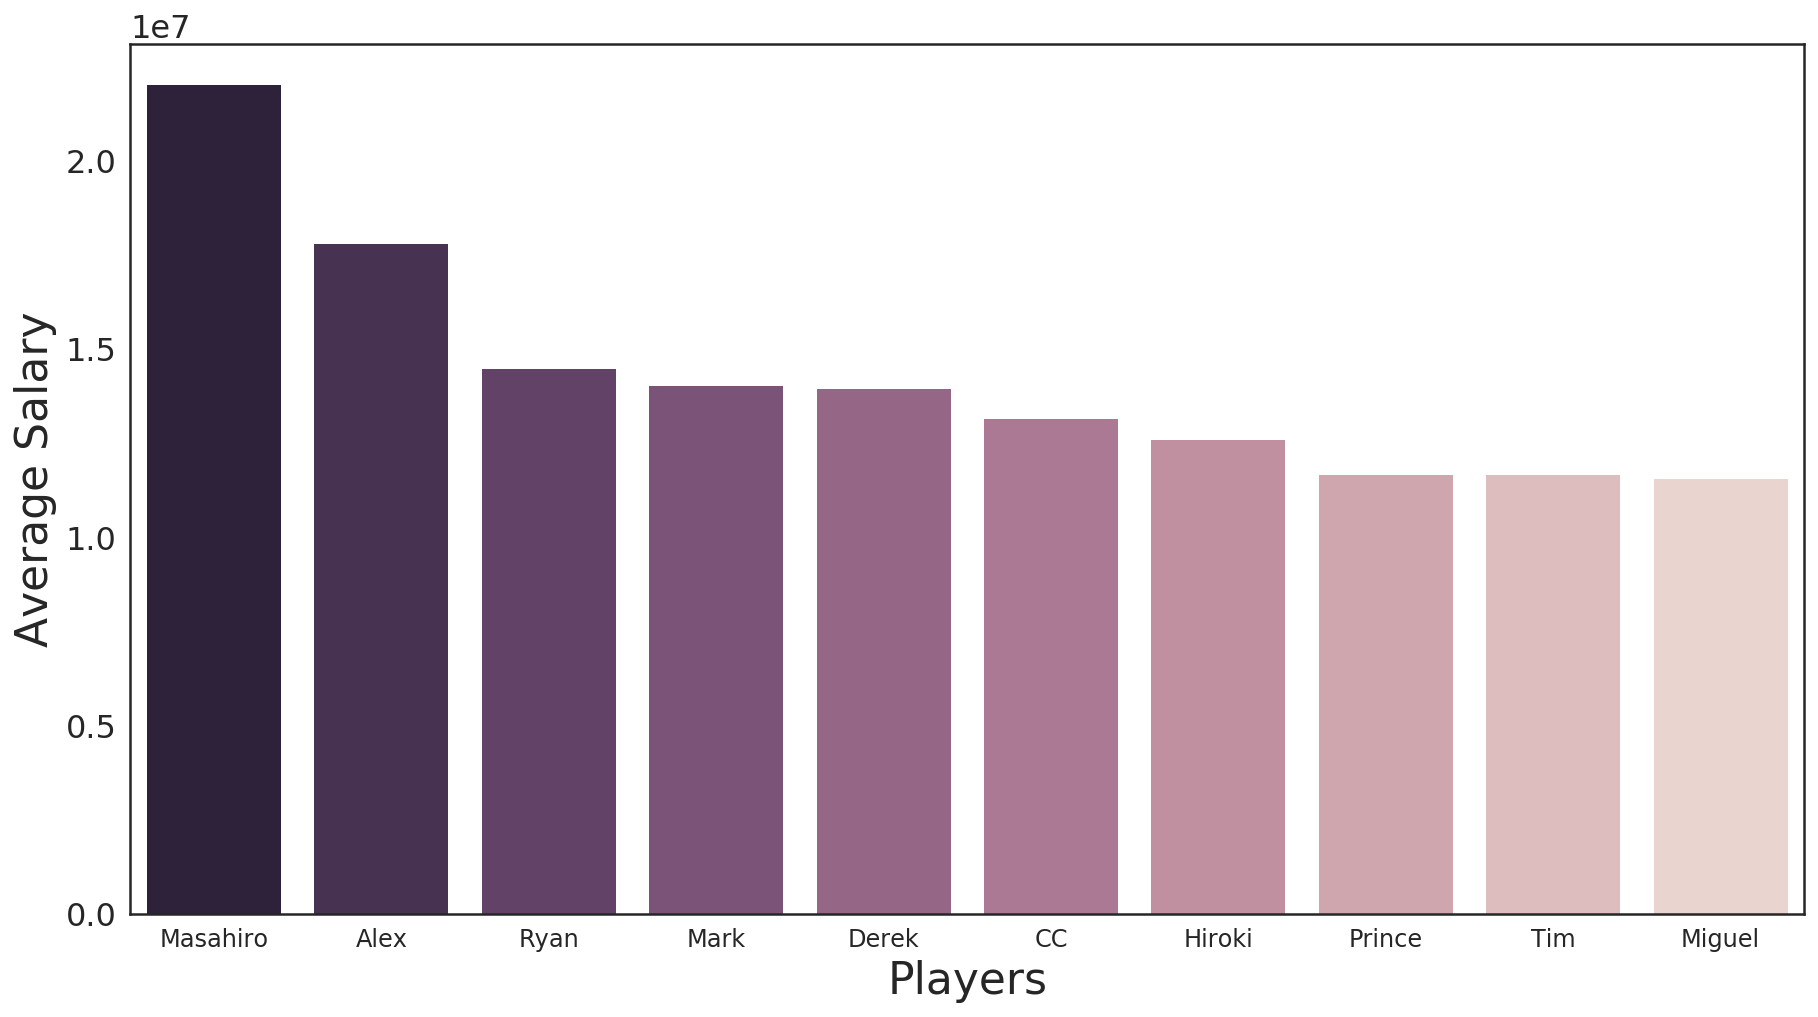

In [72]:
plot_data = plot_data[plot_data.fullName.isin(ten_most_expensive_players)] # getting only the top 10 players
plot_data = plot_data.reset_index().drop('index', axis=1)  # fixing the structure for seaborn plot
# Plotting the top 10 players #
ax = sns.barplot(x="fullName", y="salary", data=plot_data, palette=sns.cubehelix_palette(10, reverse=True))
ax.set(xticklabels=[*map(lambda e: e.split('_')[0], plot_data.fullName)])  # printing only the firstName
ax.set(xlabel='Players', ylabel='Average Salary')
plt.show()
##############################

Now before we move ahead, let's visualize the distruibution desdity of player's salary. From this we can visualize that what is the most common salary ranges teams prefer to compensate their players.

In [73]:
their_clubs

[('Alex_Rodriguez', 'NYA'),
 ('Alex_Rodriguez', 'SEA'),
 ('Alex_Rodriguez', 'TEX'),
 ('CC_Sabathia', 'CLE'),
 ('CC_Sabathia', 'NYA'),
 ('Derek_Jeter', 'NYA'),
 ('Hiroki_Kuroda', 'LAN'),
 ('Hiroki_Kuroda', 'NYA'),
 ('Mark_Teixeira', 'ATL'),
 ('Mark_Teixeira', 'NYA'),
 ('Mark_Teixeira', 'TEX'),
 ('Masahiro_Tanaka', 'NYA'),
 ('Miguel_Cabrera', 'DET'),
 ('Miguel_Cabrera', 'FLO'),
 ('Prince_Fielder', 'DET'),
 ('Prince_Fielder', 'MIL'),
 ('Prince_Fielder', 'TEX'),
 ('Ryan_Howard', 'PHI'),
 ('Tim_Lincecum', 'SFG'),
 ('Tim_Lincecum', 'SFN')]

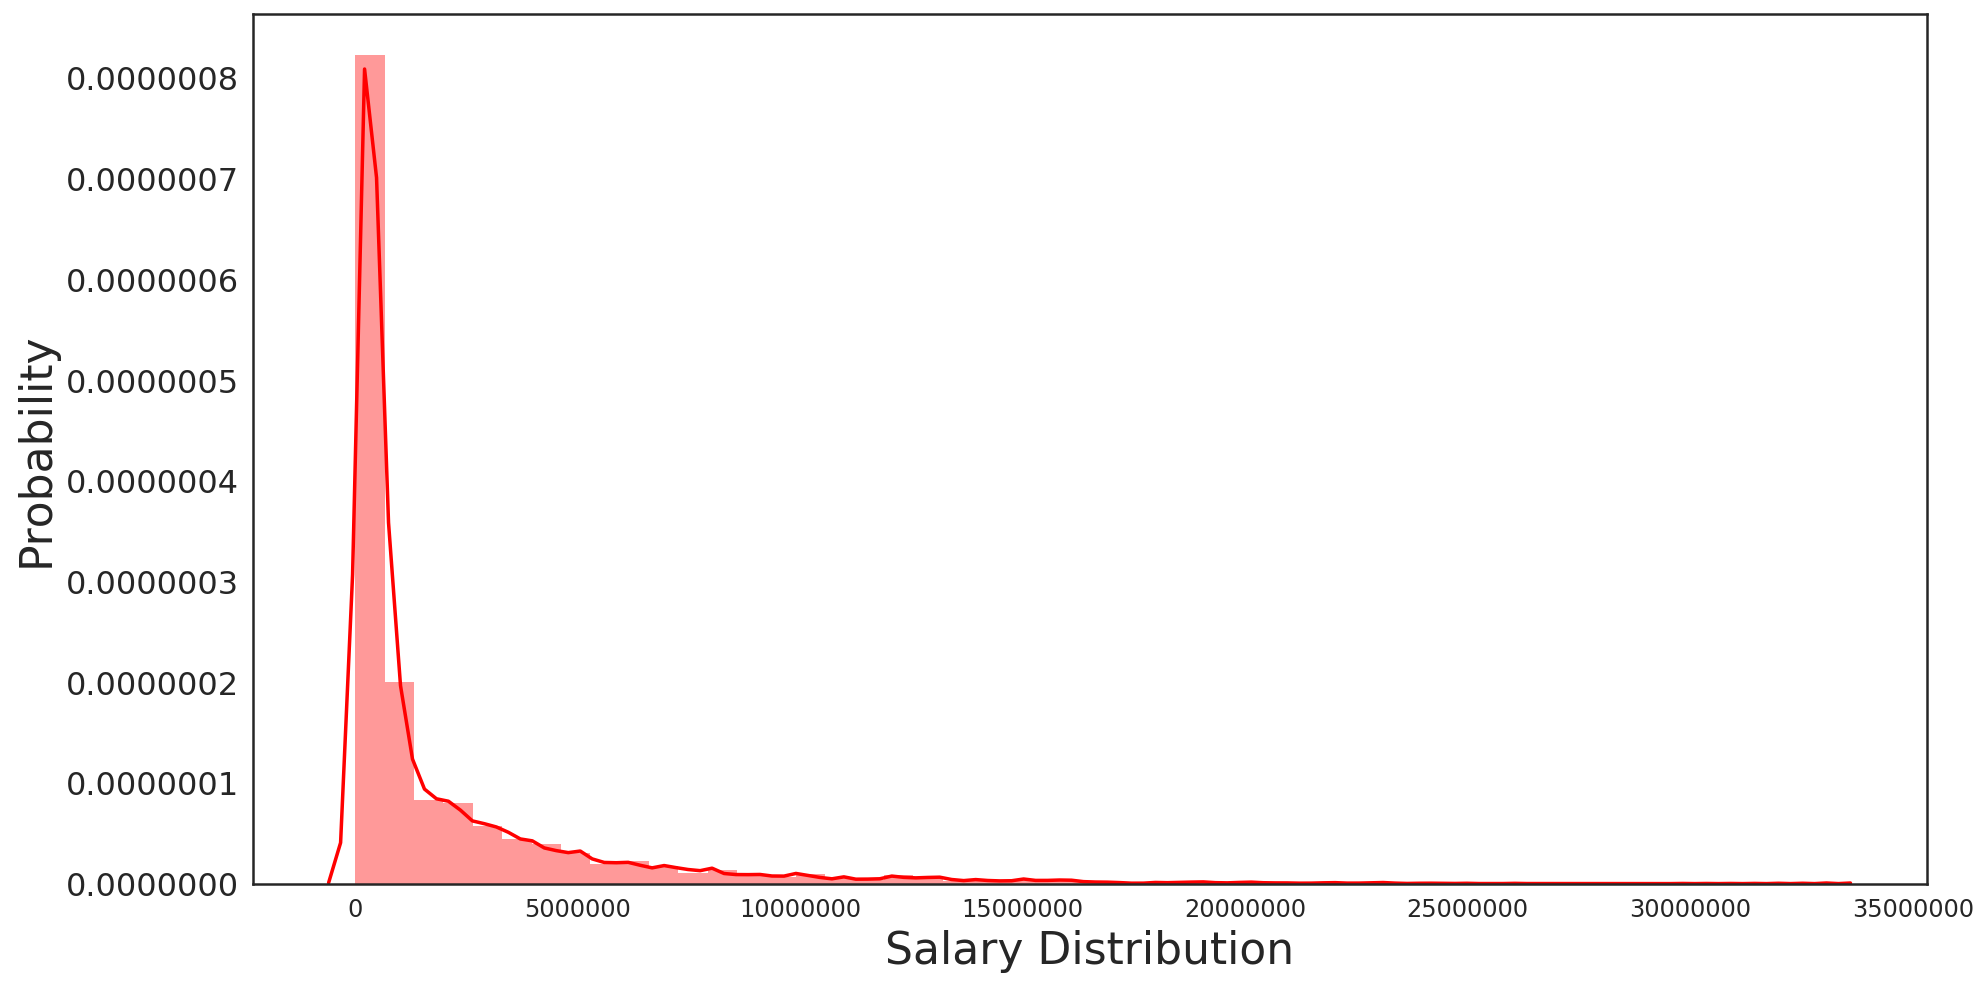

In [74]:
from scipy import stats, integrate
ax = sns.distplot(data_1.salary, bins=50, kde=True, rug=False, color='r');
# sns.kdeplot(data_1.salary, shade=True);
# ax.get_xaxis().get_major_formatter().set_useOffset(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
ax.set(xlabel='Salary Distribution', ylabel='Probability')
# TODO  Manually format the xticklabels and yticklabels values
plt.show()

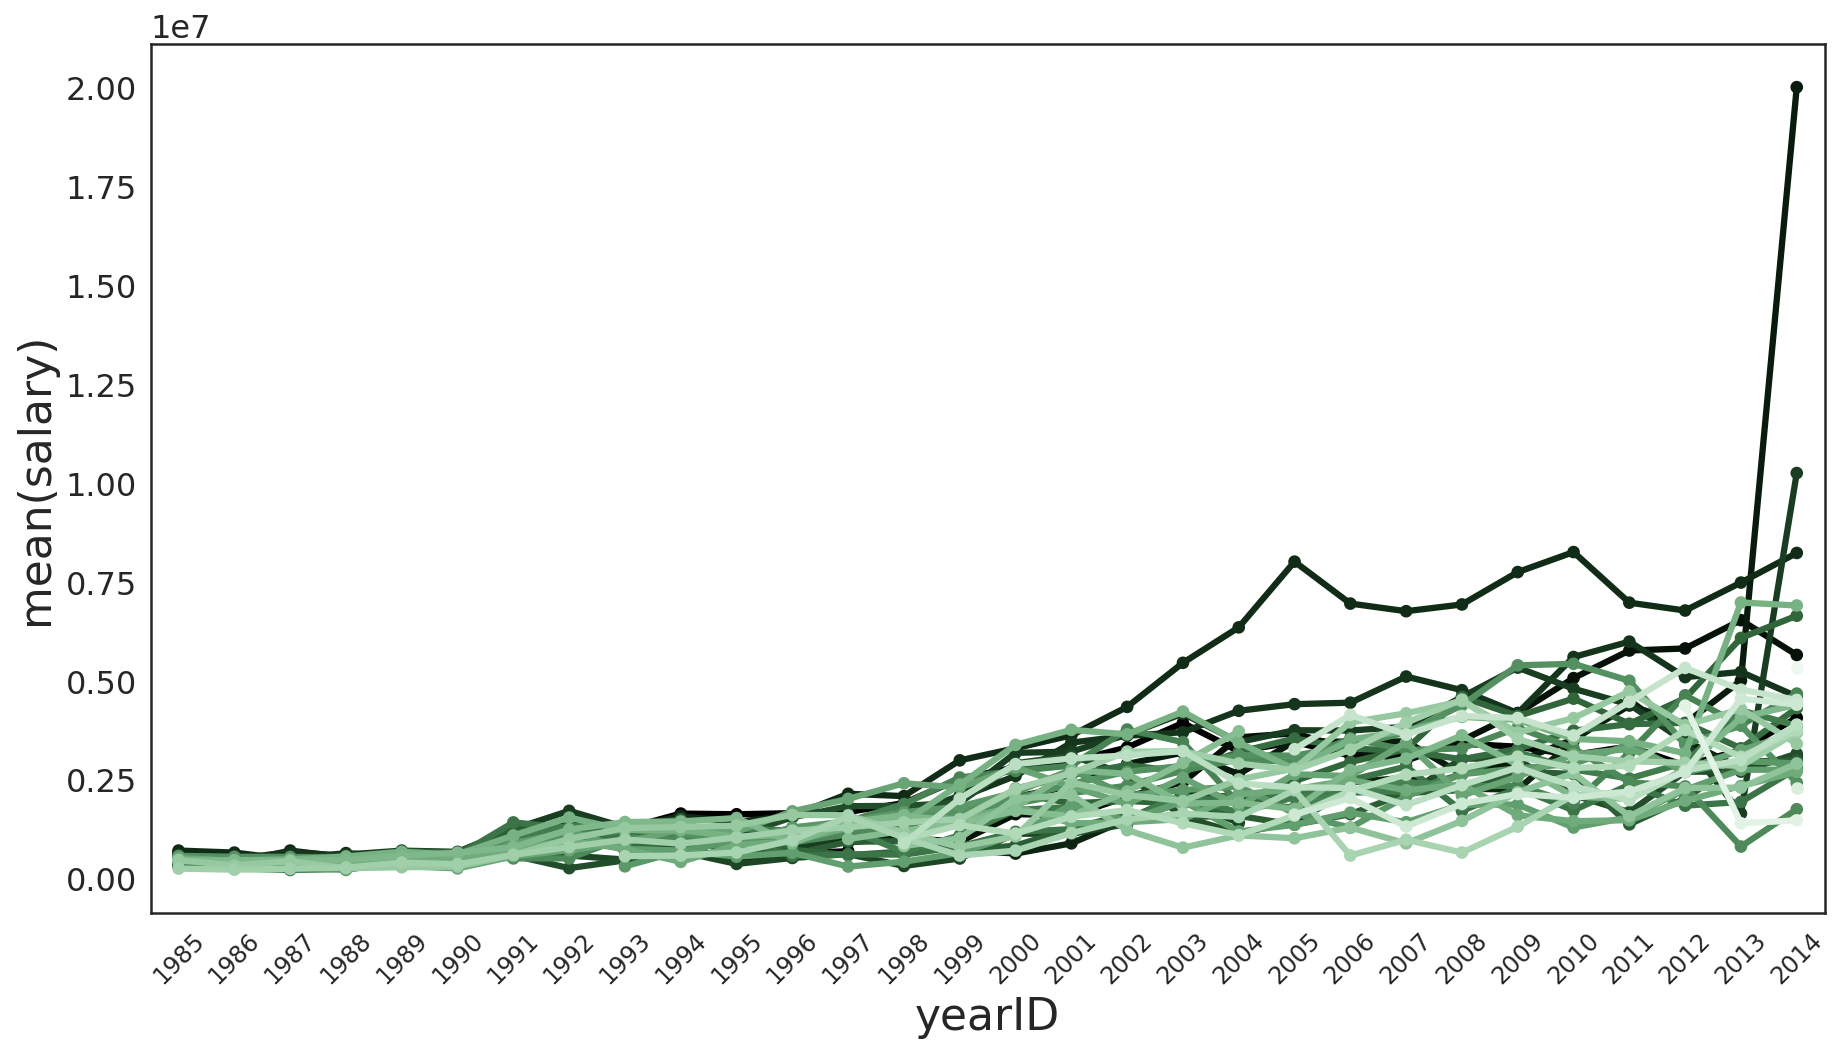

In [106]:
rot = sns.cubehelix_palette(len(data_1.teamID.unique()), start=2, rot=0, dark=0, light=.95, reverse=True)
ax = sns.pointplot(x="yearID", y="salary", data=data_1, hue='teamID', palette=rot, ci=None, markers='.')
ax.legend_.remove()
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()
# g.salary.mean()
#     print(k, grp.salary.mean())

In [153]:
batting = pd.read_csv(os.path.join(ROOT, 'Batting.csv'))
batting = batting[batting.yearID >= 1985].fillna(0).reset_index().drop('index', axis=1)

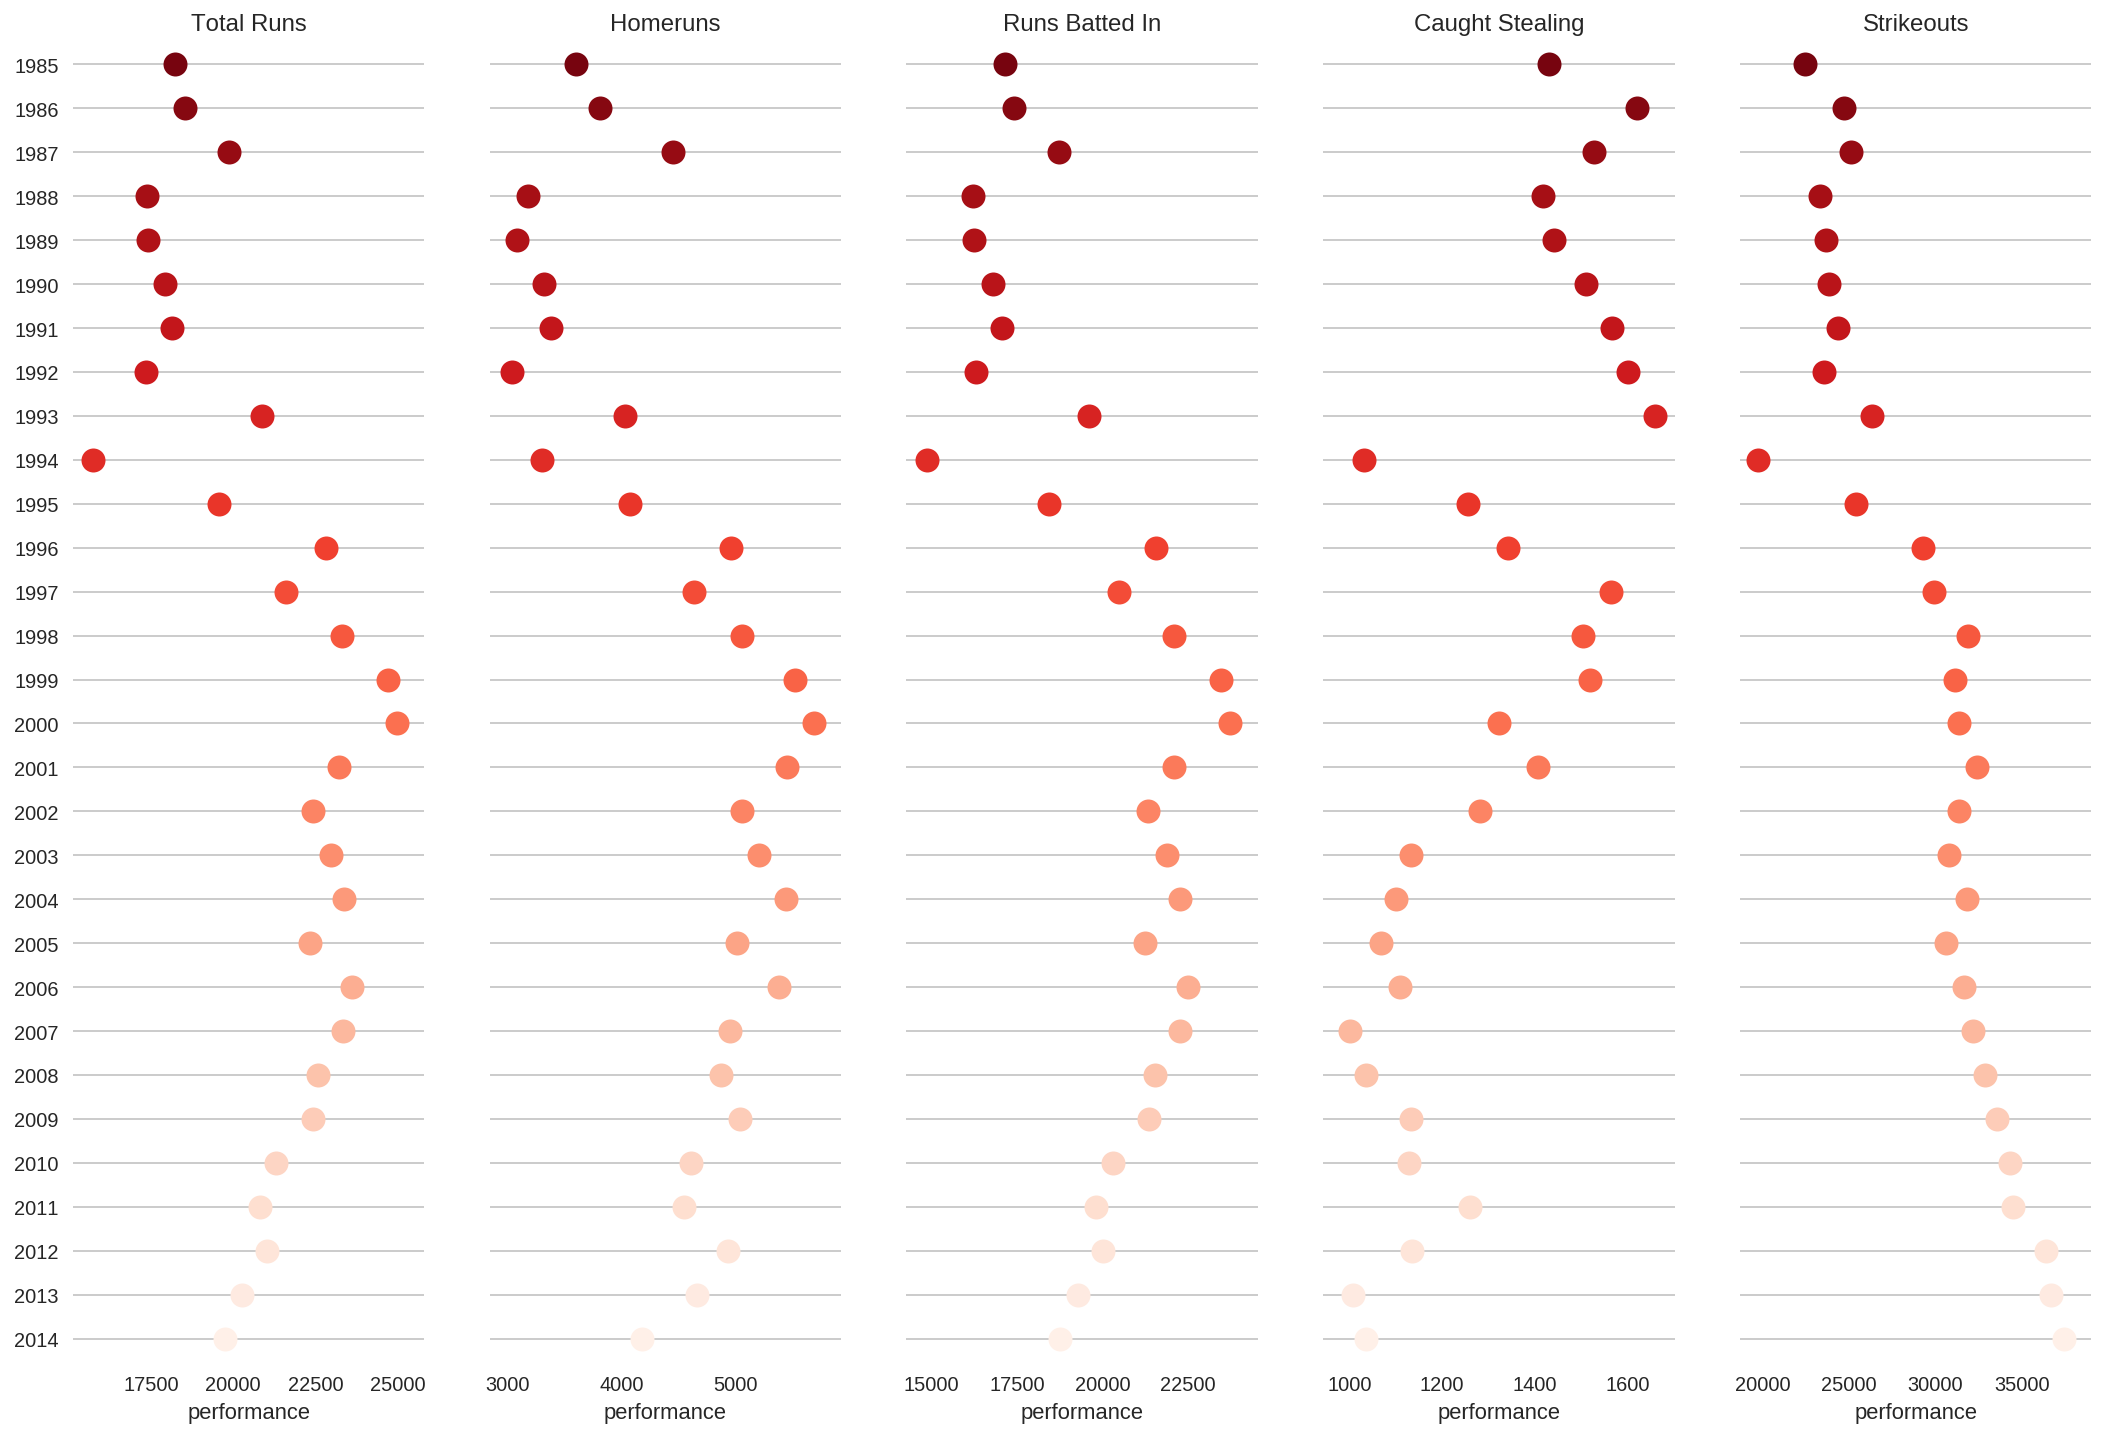

In [154]:
g = sns.PairGrid(batting.groupby('yearID', as_index=False).sum(), 
                 x_vars=['R', 'HR', 'RBI', 'CS', 'SO'], y_vars=["yearID"], 
                 size=10, aspect=.3)

# # # Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=12, orient="h",
      palette="Reds_r", edgecolor="red")

# # # Use the same x axis limits on all columns and add better labels
g.set(xlabel="performance", ylabel="")

# # # Use semantically meaningful titles for the columns
titles = ["Total Runs", "Homeruns", "Runs Batted In", "Caught Stealing", "Strikeouts"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

# #     # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
plt.show()